In [6]:
# read diabetes_vanderbilt.csv data into a DataFrame
import pandas as pd
import numpy as np
diabetes_data = pd.read_csv('diabetes_vanderbilt.csv', index_col=0)

In [2]:
diabetes_data.head()

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
id,,,,,,,,,,,,,,,,,,
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NaN,NaN,29,38,720
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NaN,NaN,46,48,360
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NaN,NaN,33,38,480
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NaN,NaN,44,41,300


In [9]:
diabetes_data.location.value_counts()

Louisa        203
Buckingham    200
dtype: int64

In [5]:
diabetes_data.columns

Index([u'chol', u'stab.glu', u'hdl', u'ratio', u'glyhb', u'location', u'age', u'gender', u'height', u'weight', u'frame', u'bp.1s', u'bp.1d', u'bp.2s', u'bp.2d', u'waist', u'hip', u'time.ppn'], dtype='object')

In [6]:
diabetes_data.gender.value_counts()

female    234
male      169
dtype: int64

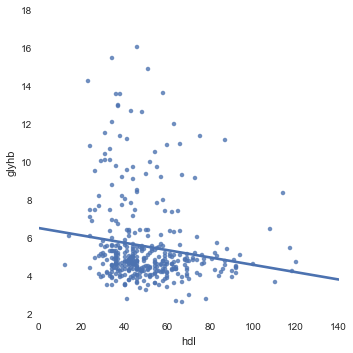

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# scatter matrix in Seaborn
sns.lmplot(x='hdl', y='glyhb', data=diabetes_data, ci=None)

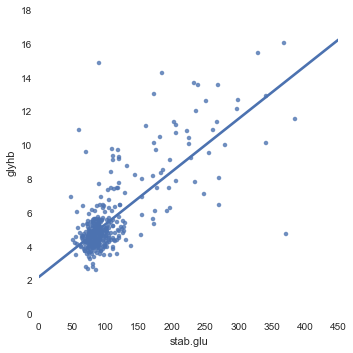

In [8]:
sns.lmplot(x='stab.glu', y='glyhb', data=diabetes_data, ci=None)

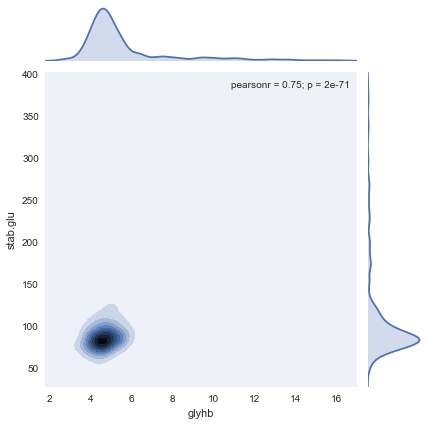

In [9]:
#Kernel desnsity plots from 
#http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html
sns.jointplot(x="glyhb", y="stab.glu", data=diabetes_data, kind="kde")

In [10]:
features = ['chol', 'stab.glu', 'hdl']
x = diabetes_data[features]
x.head(5)

,chol,stab.glu,hdl
id,,,
1000,203,82,56
1001,165,97,24
1002,228,92,37
1003,78,93,12
1005,249,90,28


In [11]:
y = diabetes_data['glyhb']
y.head(5)

id
1000    4.31
1001    4.44
1002    4.64
1003    4.63
1005    7.72
Name: glyhb, dtype: float64

In [18]:
#find the missing data from the predictors and fill them out with the average mean of cholestrol level
import pandas as pd
import numpy as np
x.chol.isnull()
x.chol.fillna(x.chol.mean(), inplace=True)
x.chol.head()

id
1000    203
1001    165
1002    228
1003     78
1005    249
Name: chol, dtype: float64

In [19]:
#find the missing data from the predictors and fill them out with the 40 for the value of a good hdl cholestrol level.
x.hdl.isnull()
x.hdl.fillna(40, inplace=True)

In [20]:
#the output is NaN for 13 datapoints, therefore we need to fill in the data
y.isnull().value_counts()

False    403
dtype: int64

In [21]:
#fill the missing data with the mean of 5.5 which is the average glyhb for this set of data
y.fillna(5.5, inplace=True)

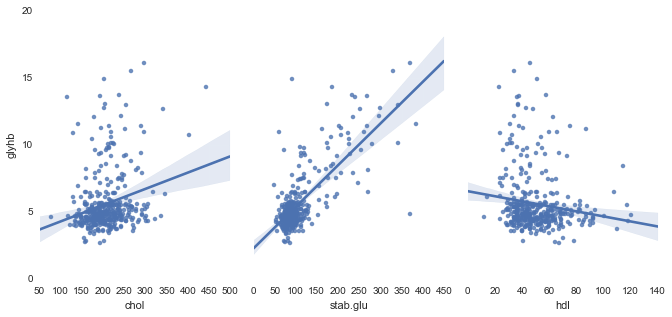

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(diabetes_data, x_vars=['chol','stab.glu','hdl'], y_vars=['glyhb'], size=4.5, aspect=0.7, kind='reg')

In [23]:
y_category = np.where(y > 7, 1, 0)

In [24]:
# cross-validation train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_category, test_size=.33, random_state=1)

##Logistic Regeression Model

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(features, logreg.coef_[0])

[('chol', -0.0032416975513370051),
 ('stab.glu', 0.026360212530261124),
 ('hdl', -0.024338972735821442)]

In [26]:
#look at the coefficients to get the equation for the line
print logreg.intercept_
print logreg.coef_

[-3.060101]
[[-0.0032417   0.02636021 -0.02433897]]


* The negative value of Total cholestrol against Glycosolated Hemoglobin shows that there is a very negligible correlation between the predictor and the response.
* Similarly High cholestrol level also has a negative value indicating the relationship between the two is negligible and thus not a good indicator for the predicting the value of Glycosolated Hemoglobin
* However as you can see there is positive correlation between Blood Glucose Level and Glycosolated Hemoglobin

In [27]:
# make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.924812030075


#### 92.48% accuracy from a Logistic regression

##Linear Regeression Model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.33, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [30]:
# look at the coefficients to get the equation for the line
print linreg.intercept_
print linreg.coef_

1.7081116298
[ 0.00599285  0.02709621 -0.0065246 ]


In [31]:
#predict the values of an Out-of Sample test Data based on X_test
y_pred = linreg.predict(X_test)

In [32]:
# MAE is the same as before
# Calculate the error between the predicted values of y_pred and y_test
print metrics.mean_absolute_error(y_test, y_pred)

0.928834273666


In [33]:
# RMSE is larger than before
# Calculate the error between the predicted values of y_pred and y_test
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.46280985959


In [34]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linreg, x, y, cv=5)
print scores

[ 0.69429037  0.47985699  0.34002015  0.45958808  0.56231332]
